## Gradient estimation via Gaussian smoothing
For a given function f(x) the gasusian smoothening is defined as:

$$
f_\sigma(x) = \mathbb{E}_{u \sim \mathcal{N}(0, \sigma^2)} [f(x + u)]
$$
This means that $f_\sigma(x)$ is the expected value of $ f(x + u)$, where $ u $ is a noise vector drawn from a Gaussian distribution with mean 0 and variance $\sigma^2 $.

In integral form, this can be expressed as:

$$
f_\sigma(x) = \int f(x + u) \frac{e^{-\frac{u^T u}{2 \sigma^2}}}{\sqrt{(2 \pi)^n}} \, du
$$
_________________________________________________________________________________________________________________________________
Lets create a function  $f(x) = e^{-10x^2}$ and try to smooth it by slowly increasing the $\sigma$
_________________________________________________________________________________________________________________________________

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

/home/jithin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [15]:
# Lets define the function
def f(x):
    return -np.exp(-10*(x**2))

In [16]:
# Lets create the discrete variables
x = np.linspace(-1, 1, 1100)
y = f(x)

In [17]:
# The sigma can be updated
sigma=np.array([0.01,0.05,0.1])
y_val=[]
for i in range(3):
 print(sigma[i])
 y_smoothened=gaussian_filter1d(y,sigma[i]*500)
 y_val.append(y_smoothened)
print(len(y_val))

0.01
0.05
0.1
3


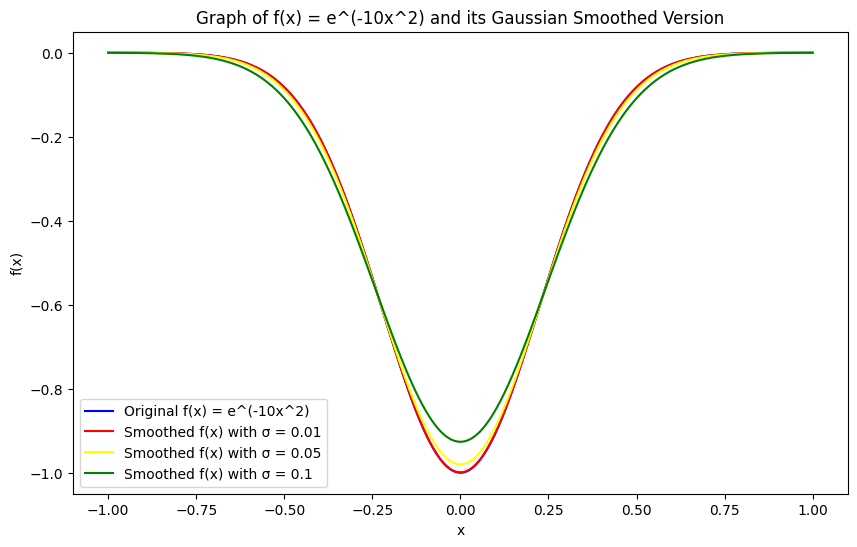

In [18]:
# Ploting the functions:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original f(x) = e^(-10x^2)', color='blue')
plt.plot(x, y_val[0], label='Smoothed f(x) with σ = 0.01', color='red')
plt.plot(x, y_val[1], label='Smoothed f(x) with σ = 0.05', color='yellow')
plt.plot(x, y_val[2], label='Smoothed f(x) with σ = 0.1', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Graph of f(x) = e^(-10x^2) and its Gaussian Smoothed Version')
plt.show()

_________________________________________________________________________________________________________________________________
Lets create a function  $f(x) = sin(10x^2)$ and try to smooth it by slowly increasing the $\sigma$
_________________________________________________________________________________________________________________________________

In [19]:
# Lets define the function
def g(x):
    return np.sin(10*x**2)

In [20]:
# Lets create the discrete variables
x1 = np.linspace(-1, 1, 1100)
y1 = g(x1)

In [21]:
y_val1=[]
for i in range(3):
 print(sigma[i])
 y_smoothened1=gaussian_filter1d(y1,sigma[i]*500)
 y_val1.append(y_smoothened1)
print(len(y_val1))

0.01
0.05
0.1
3


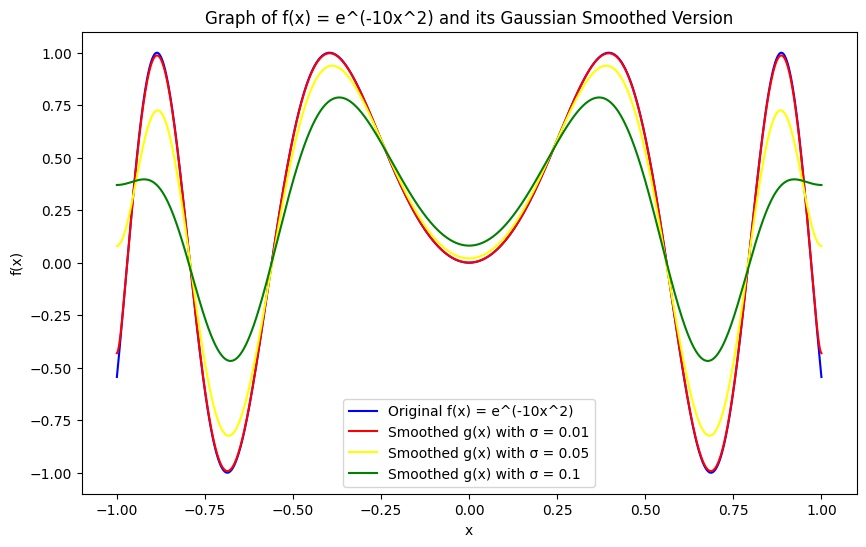

In [22]:
# Ploting the functions:
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='Original f(x) = e^(-10x^2)', color='blue')
plt.plot(x1, y_val1[0], label='Smoothed g(x) with σ = 0.01', color='red')
plt.plot(x1, y_val1[1], label='Smoothed g(x) with σ = 0.05', color='yellow')
plt.plot(x1, y_val1[2], label='Smoothed g(x) with σ = 0.1', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Graph of f(x) = e^(-10x^2) and its Gaussian Smoothed Version')
plt.show()

_________________________________________________________________________________________________________________________________
Lets create a Heavside function and try to smooth it by slowly increasing the $\sigma$
_________________________________________________________________________________________________________________________________

The Heaviside function, also known as the **step function**, is a mathematical function that has a value of 0 for negative inputs and a value of 1 for non-negative inputs. It is often denoted as \( H(x) \) and is defined as:

$$
H(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\ 
1 & \text{if } x \geq 0 
\end{cases}
$$

### Properties of the Heaviside Function

1. **Discontinuity**:
   - The Heaviside function has a discontinuity at \( x = 0 \). This "jump" from 0 to 1 makes it a **non-continuous** function.

2. **Applications**:
   - It is widely used in **engineering**, **physics**, and **signal processing** to represent systems that switch on or off at a certain point in time.
   - For example, in physics, the Heaviside function can represent an instantaneous change in current or voltage in circuits.
   - In control systems, it represents step inputs where a system is turned on at a specific time.

3. **Derivative**:
   - The derivative of the Heaviside function, in the distributional sense, is the **Dirac delta function** \( \delta(x) \), which is used to model instantaneous impulses.

4. **Alternative Representations**:
   - In some contexts, a **continuous approximation** to the Heaviside function is used to avoid the sharp jump. For example, the **sigmoid function** is a smooth approximation of a step function and is often used in neural networks.

### Why Use the Heaviside Function?

The Heaviside function is useful for modeling systems that have distinct "on" and "off" states, and it simplifies mathematical analysis by providing a straightforward way to represent changes at a specific point in time or space.
_________________________________________________________________________________________________________________________________

In [23]:
# Lets define the function
def h(x):
    return np.heaviside(x,1)  # Heaviside function, where f(x) = 1 for x >= 0 and 0 otherwise

In [24]:
# Lets create the discrete variables
x2 = np.linspace(-1, 1, 1100)
y2 = h(x2)

In [25]:
y_val2=[]
for i in range(3):
 print(sigma[i])
 y_smoothened2=gaussian_filter1d(y2,sigma[i]*500)
 y_val2.append(y_smoothened2)
print(len(y_val2))

0.01
0.05
0.1
3


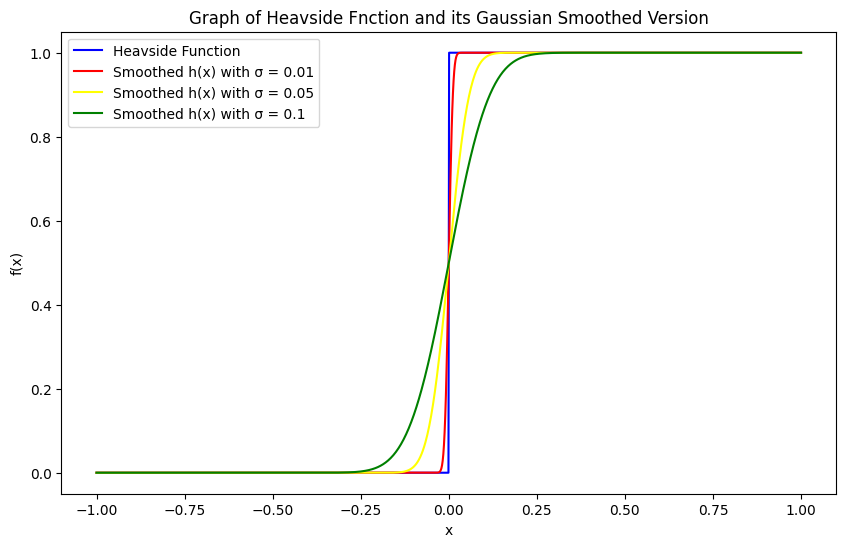

In [26]:
# Ploting the functions:
plt.figure(figsize=(10, 6))
plt.plot(x2, y2, label='Heavside Function', color='blue')
plt.plot(x2, y_val2[0], label='Smoothed h(x) with σ = 0.01', color='red')
plt.plot(x2, y_val2[1], label='Smoothed h(x) with σ = 0.05', color='yellow')
plt.plot(x2, y_val2[2], label='Smoothed h(x) with σ = 0.1', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Graph of Heavside Fnction and its Gaussian Smoothed Version')
plt.show()

---
# Gaussian Smoothing Approximation

To approximate the gradient \(\nabla f(x)\), Gaussian smoothing is applied. The **smoothed version** of \(f(x)\), denoted as \(f_{\sigma}(x)\), is defined by adding Gaussian noise to \(x\), and then taking the expectation of \(f(x + u)\), where \(u \sim \mathcal{N}(0, \sigma^2)\) (a Gaussian distribution with mean 0 and variance \(\sigma^2\)).

$$
f_{\sigma}(x) = \mathbb{E}_{u \sim \mathcal{N}(0, \sigma^2)} [f(x + u)]
$$

The gradient of this smoothed function, \(\nabla f_{\sigma}(x)\), can be approximated as:

$$
\nabla f_{\sigma}(x) = \mathbb{E}_{u \sim \mathcal{N}(0, \sigma^2)} \left[ \frac{f(x + u) - f(x)}{\sigma u} \right]
$$

This expression provides an approximation of the gradient by averaging the **directional derivatives** of \(f(x)\) in random directions \(u\) drawn from a Gaussian distribution.



## Monte Carlo Approximation

Since calculating the exact expectation (average) is difficult, it’s approximated by **sampling**. Specifically:

$$
\nabla f_{\sigma}(x) \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x + u_i) - f(x)}{\sigma u_i}
$$

where \(u_i\) are \(N\) random samples from the Gaussian distribution \(\mathcal{N}(0, \sigma^2)\). This means that instead of computing an exact gradient, we approximate it by averaging the results from a finite number of samples.



## Gradient Descent with Approximated Gradient

Once we have this approximation of \(\nabla f_{\sigma}(x)\), we can use it in **gradient descent**. This allows us to move \(x\) in the direction of the **negative approximated gradient** to minimize \(f(x)\). By iteratively updating \(x\) in this way, we can approximate the solution to $\min_x f(x)$ even for **non-smooth functions**.



## Summary

This technique, called **gradient estimation via Gaussian smoothing**, enables gradient-based optimization for functions that are otherwise hard to differentiate directly. By introducing Gaussian noise and sampling, we can approximate the gradient in a way that is **robust to noise and irregularities** in \(f(x)\).

---


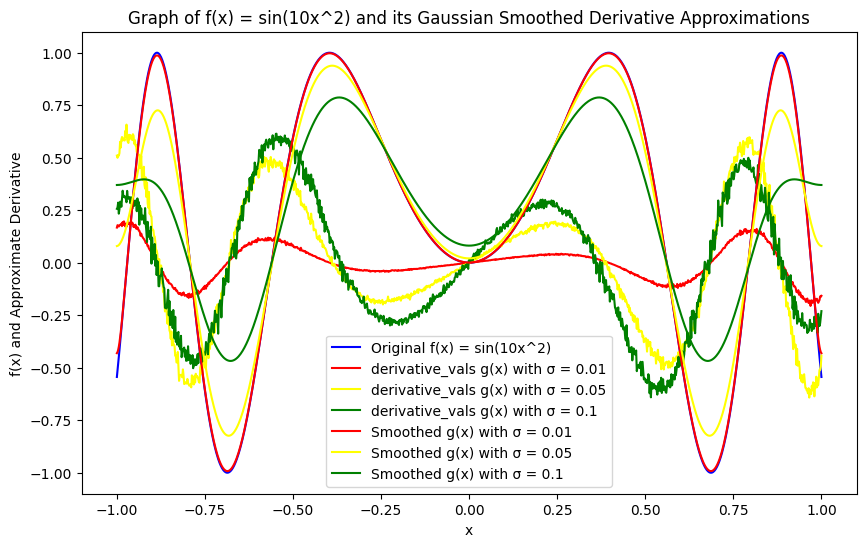

In [31]:
# Lets see the Monte Carlo approximation for f(x) = sin(10x^2)

# Define Monte Carlo function for approximating the derivative
def montecarlo(x, f=g, sigma=0.01, N=1000):
    u = np.random.normal(0, sigma, N)  # Generate N samples from Gaussian noise
    gradient_estimate = np.mean([(f(x + u_i) - f(x)) * u_i / sigma for u_i in u])  # Monte Carlo approximation
    return gradient_estimate


# Compute smoothed versions of the function for different sigma values
y_original = g(x)
derivative_vals_0_01 = [montecarlo(x_val, f=g, sigma=sigma[0]) for x_val in x]
derivative_vals_0_05 = [montecarlo(x_val, f=g, sigma=sigma[1]) for x_val in x]
derivative_vals_0_1 = [montecarlo(x_val, f=g, sigma=sigma[2]) for x_val in x]

# Plot the functions and the Monte Carlo approximation of the derivative
plt.figure(figsize=(10, 6))
plt.plot(x, y_original, label='Original f(x) = sin(10x^2)', color='blue')
plt.plot(x, derivative_vals_0_01, label='derivative_vals g(x) with σ = 0.01', color='red')
plt.plot(x, derivative_vals_0_05, label='derivative_vals g(x) with σ = 0.05', color='yellow')
plt.plot(x, derivative_vals_0_1, label='derivative_vals g(x) with σ = 0.1', color='green')
plt.plot(x1, y_val1[0], label='Smoothed g(x) with σ = 0.01', color='red')
plt.plot(x1, y_val1[1], label='Smoothed g(x) with σ = 0.05', color='yellow')
plt.plot(x1, y_val1[2], label='Smoothed g(x) with σ = 0.1', color='green')

plt.xlabel('x')
plt.ylabel('f(x) and Approximate Derivative')
plt.legend()
plt.title('Graph of f(x) = sin(10x^2) and its Gaussian Smoothed Derivative Approximations')
plt.show()

---